# Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# new import statements
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score

In [ ]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], \
                  columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [ ]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test

### Three models
- Model 1: Predict petal width 
    - regression problem
- Model 2 - part a: Predict whether flower is "setosa"
    - classification problem, specifically binary classification: True / False
- Model 2 - part b: Predict probablity of flower being "setosa"
    - classification problem, probablity between 0 to 1

### Model 1: Predict petal width

- regression problem

In [ ]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "petal width (cm)"

# 1. initialize model
reg_model = 
# 2. fit using train data

# 3. predict for test data and add predictions as a column
test["pet_width_predictions"] = 
test

Review of `score` method that enables us compute R^2 score.

In [ ]:
# model score

##### Math behind model 1: how does it predict?

Recall that we can extract co-efficients using `<model obj>.coef_`.

In [ ]:
# converting into a vertical array / vector and assigning values to c
c = reg_model.coef_
c

In [ ]:
# assign X
X = 
X

Let's use Linear Algebra to do the prediction `y = X @ c`.

In [ ]:
y = 
y

In [ ]:
# comparing with model predictions
test["pet_width_predictions"]

## LogisticRegression

- classification model
- predict categorical labels

### Model 2 - part a: Predict whether flower is "setosa"

- classification problem, specifically binary classification: True / False

In [ ]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

# 1. initialize model
cls_model = 
# 2. fit using train data
cls_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["setosa_predictions"] = cls_model.predict(test[xcols])
test

What is the accuracy? That is what percent of the time is it correct?

In [ ]:
cls_model.score(test[xcols], test[ycol])

##### Math behind model 2 - part a: how does it predict?

In [ ]:
cls_model.coef_.reshape(-1, 1)

In [ ]:
# converting into a vertical array / vector and assigning values to c
c = 

In [ ]:
# assign X
X = test[xcols].values
X

Let's use Linear Algebra to do the prediction `y = X @ c`.

In [ ]:
X @ c

Negative values => False and positive => True.

In [ ]:
# applying boolean condition


In [ ]:
# comparing with model predictions
test["setosa_predictions"]

### Model 2 - part b: Predict probablity of flower being "setosa"

- classification problem, probablity between 0 to 1

#### `<model object>.predict_proba(X)`

- Calibrated probabilities of classification.
- returns a numpy array of probabilities (that it is True):
    - [[False probablity, True probablity], ...]
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV.predict_proba

Extract just the True probablities.

In [ ]:
cls_model.predict_proba(test[xcols])???

In [ ]:
test["setosa_prob"] = cls_model.predict_proba(test[xcols])[:, 1]
test

##### Math behind model 2 - part b: how does it predict?

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

Let's use Linear Algebra to do the prediction `y = X @ c`.

In [ ]:
# Predict the probability of True
sigmoid(X @ c)

In [ ]:
# comparing with model predictions
test["setosa_prob"]

### Model 3: Predict variety of flower

- classification problem, specifically multi-class classification for `variety`

In [ ]:
# PREDICT: which of the 3 varieties is a particular Iris?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = ???

# 1. initialize model
mult_model = ???
# 2. fit using train data
mult_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["variety_predictions"] = mult_model.predict(test[xcols])
test

What is the accuracy?

In [ ]:
mult_model.score(test[xcols], test[ycol])

##### Math behind model 3: how does it predict?

In [ ]:
mult_model.coef_

#### Why take a transpose? 
Recall from simpler model that the orientation of the array does not match with what we want for c (vertical vector). This still applies for a model that predicts multiple labels - so we still need a transpose - that is before transpose, each row represents the co-efficients for a single label (variety in this example).

In [ ]:
# taking transpose and assigning values to c
c = mult_model.coef_.T
c

After transposing, each **column** contains coefficients for scoring a different `variety`. 

If you add "petal length (cm)" as one more input feature, you will get an initial `3 x 4` matrix for the co-efficients, which is why we need to take a transpose and make it into a `4 x 3` matrix. Try this yourself.

In [ ]:
c.shape # 3 varities

How can we determine name of each `variety`? 

#### `<model object>.classes_`

- ndarray containing label for each class.
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
mult_model.???

In [ ]:
# assign X
X = test[xcols].values
X

Extracting "setosa" co-efficients.

In [ ]:
# we need a 2-D array
setosa_c = mult_model.coef_.T[ROW, COL]
setosa_c

Let's use Linear Algebra to do the prediction just for "setosa" `y = X @ c`.

In [ ]:
X @ setosa_c

Repeating for other varities.

In [ ]:
# versicolor scores
versicolor_c = mult_model.coef_.T[:, [1]] 
X @ versicolor_c

In [ ]:
# virginica scores
virginica_c = mult_model.coef_.T[:, [2]] 
X @ virginica_c

#### Review: how does `MATRIX @ vertical vector` work?

- MATRIX (data) @ vertical vector (coef) gets computed using the below LOOP:
    - For each DATA ROW of MATRIX
        - ROW (horizontal) @ c (vertical)

#### How does `MATRIX 1 @ MATRIX 2` work?

- MATRIX 1 (data) @ MATRIX 2 (coef) gets computed using the below NESTED LOOP:
    - For each DATA ROW of MATRIX 1
        - For each COEFFICIENT COLUMN of MATRIX 2
            - compute the vector @ vector (dot product)
            
Computing all predictions.            

In [ ]:
# all varities
c = mult_model.coef_.T
X @ c
# Largest score determines the classification prediction output

In [ ]:
test["variety_predictions"]

### `max`, `argmax` methods on `np.array` 

- `max`: returns max value
- `argmax`: returns index of the max value
- same idea for min, argmin

In [ ]:
a = np.array([1, 2, 9, 8, 7])
a.max()

In [ ]:
a.argmax()

Let's convert `X @ c` to actual label predictions.

In [ ]:
# gives the index of tha max value
(X @ c).argmax()

In [ ]:
# we want max of each row
(X @ c).argmax(axis=???)

In [ ]:
mult_model.classes_

`<model obj>.classes_` can return labels given a list of indices.

In [ ]:
mult_model.classes_[[0, 1, 2, 0, 1, 2]]

Putting `argmax` and `classes_` together.

In [ ]:
mult_model.classes_[???]

In [ ]:
pd.Series(mult_model.classes_[(X @ c).argmax(axis=1)])

In [ ]:
test["variety_predictions"]

### Review: LinearRegression visualization

- recall that we would draw a "fit line" to visualize how well LinearRegression performs when there is only one input feature (X)
    - it was hard to draw a visualization when we had more than one input features (X)

### Visualize Decision Boundaries

- we can draw something called "decision boundaries" to visualize how well LogisticRegression performs when we only hae two input variables. For example: sepal length and sepal width.

<div>
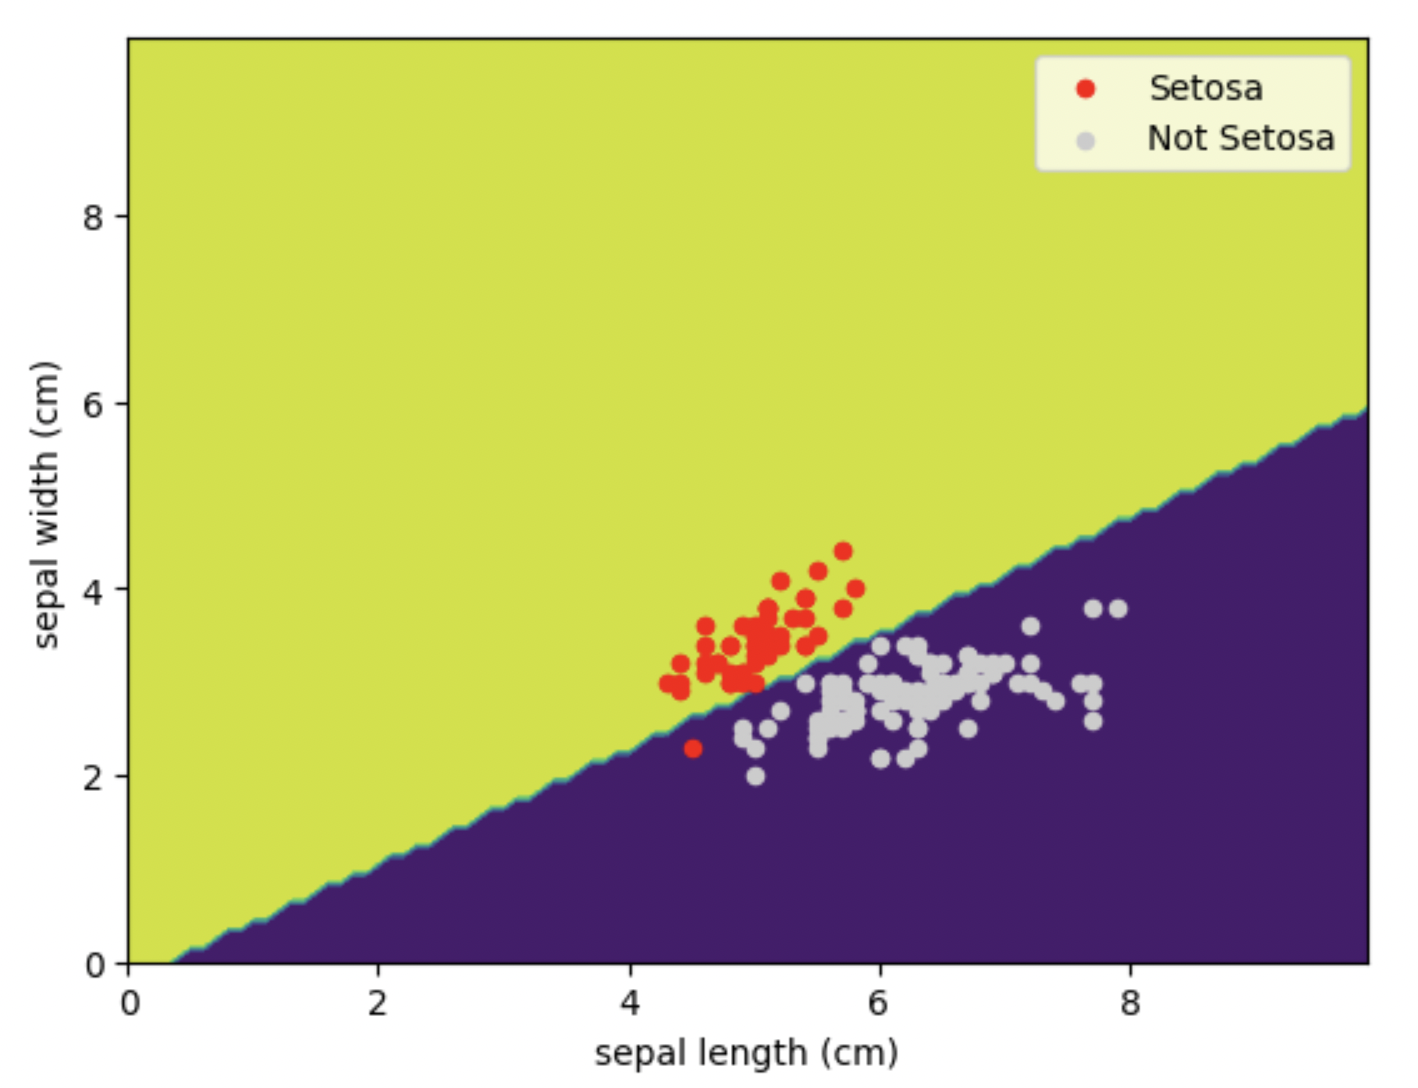
</div>

Recall that we can use `np.arange` to generate a range of numbers.

In [ ]:
np.arange(10)

### `np.meshgrid(x1, x2, ...)`

- Make N-D coordinate arrays given one-dimensional coordinate arrays x1, x2,…, xn.
- Returns an array of arrays.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [ ]:
# in each cell, the number is the x-coordinate of that position
X 

In [ ]:
# in each cell, the number is the y-coordinate of that position
Y

#### `Z = F(X, Y)`, where `F(X, Y) = X * Y`

In [ ]:
Z = X * Y    
Z

### Contour visualizations

- enables us to visualize a 3-D structure like a mountain using 2-D visualization
- example: https://en.wikipedia.org/wiki/Contour_line#/media/File:Contour2D.svg
- for classification result:
    - we have True / False
    - so we will have a contour that has two plateaus:
        - a higher plateau for True
        - a lower plateau for False
    - x and y-coordinates will be the input features
        
### `plt.contourf(X, Y, Z, levels=<num>)`

- enables us to produce contour lines and filled contours
    - larger the number => brighter the color
- `levels`: determines the number and positions of the contour lines / regions
- documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html

In [ ]:
# countourf plot with X, Y, Z


In [ ]:
# higher granularity, by adding levels=100
plt.contourf(X, Y, Z)

In [ ]:
cls_model

In [ ]:
df[xcols]

#### `predictions = F(sepl, sepw)`

In [ ]:
# Creating range of values for sepl (X) and sepw (Y)
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
sepl

#### `predictions = F(sepl, sepw)`

In [ ]:
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl,
    'sepal width (cm)': sepw,
    'const': 1
})
predict_df.head()

In [ ]:
# Predicting setosa (True / False) labels using LogisticRegression model
Z_predictions = cls_model.predict(predict_df)
Z_predictions

In [ ]:
print(sepl.shape)
print(sepw.shape)
print(Z_predictions.shape)

In [ ]:
plt.contourf(sepl, sepw, Z_predictions)

#### How can we extract `AxesSubplot` object instance? We need to use a function called `plt.gca()`.

In [ ]:
# Creating contourf plot
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
# get current axes subplot
???
df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                              ax=ax, color="r", label="Setosa")

#### Visualizing Multiple-classification Boundaries (self-study example)

In [ ]:
classes_ = list(mult_model.classes_)
classes_

In [ ]:
classes_.index("versicolor")

In [ ]:
# we need numeric values for Z
# hence .index usage instead of actual values of variety predictions
predictions = np.array([classes_.index(name) for name in mult_model.predict(predict_df)])
predictions

In [ ]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

#### Can we do better by creating a `Pipeline` of `PolynomialFeatures` and `LogisticRegression` models?

In [ ]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

# Let's create a Pipeline
model = ???
model.fit(train[xcols], train[ycol])

In [ ]:
# Creating range of values for sepl (X) and sepw (Y)
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})
# Predicting setosa (True / False) labels using LogisticRegression model
Z_predictions = model.predict(predict_df)
Z_predictions

In [ ]:
# Creating contourf plot
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                              ax=ax, color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                               ax=ax, 
                               color="0.8", label="Not Setosa")

#### Multi-classification model to predict `variety` using  `Pipeline` of `PolynomialFeatures` and `LogisticRegression` models

In [ ]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train[ycol])

#### LogisticRegression uses an "iterative algorithm"

- chooses some random coefficients
- LOOP (some fixed number of iterations/"epochs")
    - tweaks the coefficients to get slightly better accuracy
    - if accuarcy isn't improving much:
        - exit the loop early

#### Solution 1: increase number of iterations

In [ ]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=???)),
])
model.fit(train[xcols], train[ycol])

In [ ]:
# Predicting variety labels using LogisticRegression model
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
predictions

In [ ]:
# Creating contourf plot
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

#### Solution 2: Transform the data into something LogisticRegression can learn from more quickly

- LogisticRegression likes data that is standardized:
    1. "small" numbers
    2. "centered" numbers (average of the column is 0)

In [ ]:
a = np.array([1, 2, 8, 9])
a

How do we get "centered" numbers?

In [ ]:
a - a.mean()

How do we get "small" numbers?

In [ ]:
a / 10

In [ ]:
a / a.std()

In [ ]:
# LogisticRegression would like to learn from a column of data that looks like this
(a - a.mean()) / a.std()

### `StandardScaler`

- requires import: `from sklearn.preprocessing import StandardScaler`

In [ ]:
StandardScaler().???

#### Recommendations: 

1. Always use StandardScaler with LogisticRegression
2. PolynomialFeatures should be BEFORE StandardScaler (when using both)

In [ ]:
# solution 2: use StandardScaler
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=100)),
])
model.fit(train[xcols], train[ycol])

In [ ]:
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
predictions

In [ ]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

Why should we use `PolynomialFeatures` before `StandardScaler`?

1. Data won't be centered if second step is `PolynomialFeatures`
2. Also, when you square after standardization, small and large numbers have same value.

In [ ]:
a

In [ ]:
scaled = (a - a.mean()) / a.std()   # like StandardScaler
scaled

In [ ]:
scaled ** 2   # like PolynomialFeatures

As opposed to that, if we do `PolynomialFeatures` first and then `StandardScalar` next, we will get what we want.

In [ ]:
a

In [ ]:
squared_a = a ** 2 # like PolynomialFeatures
squared_a

In [ ]:
(squared_a - squared_a.mean()) / squared_a.std()   # like StandardScaler

### Scoring and Metrics

- https://scikit-learn.org/0.15/modules/model_evaluation.html
- import statements:
```python
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
```

In [ ]:
# pattern: positive => True, negative => False
df = pd.DataFrame([
    [15, True],
    [-2, False],
    [99, True],
    [-10, False],
    [8, True],
    [5, True],
    [-1000, False],
    [-1, False],
], columns=["x", "y"])
train, test = df.iloc[:4], df.iloc[4:]

In [ ]:
train

In [ ]:
test

In [ ]:
model = LogisticRegression()
model.fit(train[["x"]], train["y"])
model.predict(test[["x"]])

In [ ]:
# by default, this uses accuracy_score
model.score(test[["x"]], test["y"])   

#### `accuracy_score(y_true, y_pred)`

- same result as invoking `score` method
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
# simple example
accuracy_score(["A", "B"], ["A", "C"])

In [ ]:
accuracy_score(ACTUAL, PREDICTED)

What are the range of values of `accuracy_score` for a classification model?
- `0 to 1` because it is a fraction of predicted labels / actual labels => remember you can either get it correct or wrong.
- Recall as opposed to classification, for regression range for R^2 score is `-infinity to 1` => that is because the model can introduce non-existent variance within the data while trying to fit it!

#### Confusion Matrices

#### `confusion_matrix(y_true, y_pred)`

- computes confusion matrix for classification:
    - row dimension represents actual value
    - column dimension represents predicted value
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

<div>
<img src="Confusion_matrix.png" width="500"/>
</div>

In [ ]:
actual =    ["dog", "dog", "dog", "dog", "cat", "cat", "cat", "mouse", "mouse"]
predicted = ["dog", "dog", "dog", "cat", "cat", "dog", "cat", "mouse", "mouse"]

In [ ]:
# ROW: an actual category
# COL: a prediction
confusion_matrix(actual, predicted)

In [ ]:
# notice that we have a "horse" label even though the data doesn't have any info about horse
labels = ["dog", "cat", "mouse", "horse"]
cm = confusion_matrix(actual, predicted, labels=labels)
cm

In [ ]:
pd.DataFrame(cm, index=labels, columns=labels)

In [ ]:
actual =    ["dog", "dog", "dog", "dog", "cat", "cat", "cat", "cat", "mouse", "mouse"] * 199
predicted = ["dog", "dog", "dog", "dog", "cat", "dog", "cat", "dog", "mouse", "mouse"] * 199
actual += ["horse"] * 10
predicted += ["dog"] * 9 + ["horse"]

labels = ["dog", "cat", "mouse", "horse"]
cm = confusion_matrix(actual, predicted, labels=labels)
cm = pd.DataFrame(cm, index=labels, columns=labels)
cm

### Recall and balanced accuracy score

- import statement:
```python
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
```

#### Recall: row-wise ratio

- What proportion of actual positives was identified correctly?

In [ ]:
# what is the recall for cat?
cm.at["cat", "cat"] / cm.loc["cat", :].sum()

In [ ]:
# There are multiple recall scores as we have multiple labels
# So, we need to pass argument to parameter "average"
recall_score(actual, predicted)

In [ ]:
recall_score(actual, predicted, average=None)

In [ ]:
# How can we identify which score is for which label?
print(labels)
# We can pass a list of labels argument to parameter "labels"
recall_score(actual, predicted, average=None, labels=labels)

In [ ]:
cm

In [ ]:
How does average recall score compare against accuracy score?

In [ ]:
accuracy_score(actual, predicted)

In [ ]:
# will this be bigger or smaller than accuracy?
recall_score(actual, predicted, average=None, labels=labels).mean()

We are saying "horse" is equally important as other animals by taking an average of recall. So average recall score is lower than overall accuracy.

#### Average recall score is "Balanced accuracy score"

In [ ]:
# average of recall scores is called balanced accuracy score
balanced_accuracy_score(actual, predicted)

Why does "Balanced accuracy score" matter?

- Imagine you are building a new covid test. We know majority of the times covid test is supposed to be negative.
- So, you might get a high accuracy even if your covid test is missing actual positives.
- If you just look at accuracy, that might be misleading. So, you must also look at "Balanced accuracy score".

### Precision: column-wise ratio

- What proportion of positive identifications was actually correct?

In [ ]:
cm

In [ ]:
print(labels)
precision_score(actual, predicted, average=None, labels=labels)

### Binary Classification Metrics

Unless otherwise specified, "precision" and "recall" refer to those metrics for the positive class when we're doing binary classification.

<div>
<img src="Confusion_matrix_binary.png" width="350"/>
</div>

In [ ]:
actual = [False, True, True, True, True, False, False, True, True, True, True, True, True]
predicted = [False, True, True, True, True, True, True, False, False, False, True, True, True]
confusion_matrix(actual, predicted)

In [ ]:
recall_score(actual, predicted, average=None, labels=[True, False])

In [ ]:
# for binary classification, we have False recall and True recall
# "recall" is shorthand for "True recall"
recall_score(actual, predicted)

In [ ]:
precision_score(actual, predicted, average=None, labels=[True, False])

In [ ]:
# for binary classification, we have False precision and True precision
# "precision" is shorthand for "True precision"
precision_score(actual, predicted)